In [3]:
pip install datatile

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [16]:
from datatile.summary.df import DataFrameSummary
import pandas as pd
import numpy as np
import missingno as msno
import csv
import requests
import json
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
url = 'https://opendata.arcgis.com/api/v3/datasets/ed0468f5e579464b84727a4ab614fd40_0/downloads/data?format=csv&spatialRefId=4326'
headers =  {}

try:
    response = requests.get(url, headers)
    response.raise_for_status()

except requests.exceptions.HTTPError as APIerror:
    print(error)




##result = pd.DataFrame.from_dict(response)
##result = pd.read_json(response)

    

In [7]:
## Our data is in bytes, since we downloaded the data as a CSV
print(type(response.content))

<class 'bytes'>


In [8]:
## Let's grab the our proposed filename 'Propery_Boundary_View.csv' from our response 

filename_header = response.headers['Content-Disposition']
filename = filename_header.split('=')[1]
filename = eval(filename)
print(filename)

##tempdf = pd.read_csv(response.text)
##tempdf

Property_Boundary_View.csv


In [9]:
## In order to write into a  file and download to the proposed directory, we should specify our path using Python path 

folder_path = os.path.abspath(os.curdir)
print(folder_path)
dataset_path = folder_path + "/" + filename
print(dataset_path)

/Users/nicolastobon/Desktop/Data Projects/Miami-Properties
/Users/nicolastobon/Desktop/Data Projects/Miami-Properties/Property_Boundary_View.csv


In [10]:
## Let's write to a file, using our response.iter_content with a 128 as our chunk_size. 
## chunk_size is just a way to read from memory in chunks of 128 bytes, rather than reading all at once.

with open(dataset_path, 'wb') as local_file:
            for chunk in response.iter_content(chunk_size=128):
                  local_file.write(chunk)

In [11]:
## Let's open our CSV file, and read it.

with open('Property_Boundary_View.csv') as csv_file:
    reader = csv.reader(csv_file)

In [12]:
## We pass our CSV file into pd.read_csv to load our DataFrame

result = pd.read_csv('Property_Boundary_View.csv')
print(type(result))

/Users/nicolastobon/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>


In [13]:
## pd.set_option max_columns allows us to view all of our columns, rather than a shortened number, when calling pd functions

pd.set_option('max_columns', None)

In [14]:
## Using the package dataTile, let's pass in our DataFrame into our DataFrameSummary function, and call summary which allows
## us to see the most important statistics for each of our columns 

dfs = DataFrameSummary(result)
dfs.summary()

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
count,582889.0,582889.0,577546.0,582889.0,582889.0,582889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,577491.0,NaN,576902.0,577491.0,577491.0,577491.0,577491.0,577491.0,577491.0,577491.0,577491.0,577491.0,577491.0,577491.0,541292.0,541292.0,NaN,582889.0,582889.0
mean,291445.0,300316.601344,2235409569146.066406,542848.072245,877507.865002,514033.6257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1977439019109.910889,952.730785,NaN,223565747.511796,3.333602,2.27276,0.117697,1.202026,1.424244,3734.543402,3429.380136,212623.694724,1734.25186,2022.0,554776.392503,20091731.212532,523014.15199,NaN,10385.295186,192.05433
std,168265.704866,175568.069419,1262498865083.462891,15423.111114,34033.632947,50473.093224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1314176965763.345947,2259.453606,NaN,126255220.52704,21.812396,12.370458,1.284018,45.819677,12.2871,30580.746445,30114.065932,11008705.505947,670.501893,0.0,4942662.818148,114952.637477,3809344.155397,NaN,487447.522718,473.993822
min,1.0,1.0,0.0,514131.0,698060.1,293562.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141150220001.0,0.0,NaN,10100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,0.0,19230317.0,0.0,NaN,0.669922,6.448753
25%,145723.0,148968.0,722070310492.5,534012.0,852810.2,480836.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430020500001.0,101.0,NaN,72207031.0,2.0,1.0,0.0,1.0,1.0,1349.0,1197.0,5000.0,1950.0,2022.0,129571.0,20021101.0,100.0,NaN,584.376953,103.755297
50%,291445.0,298636.0,3040120110135.0,543934.0,876697.9,516505.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3040180500001.0,101.0,NaN,304012011.0,3.0,2.0,0.0,1.0,1.0,1892.0,1620.0,7500.0,1966.0,2022.0,217005.0,20130801.0,120000.0,NaN,853.175781,121.293998
75%,437167.0,447941.0,3059210332107.5,553923.0,904433.0,555320.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3122140000001.0,410.0,NaN,305921033.0,4.0,2.0,0.0,1.0,1.0,2570.0,2169.0,10350.0,1990.0,2022.0,333345.5,20181116.0,315000.0,NaN,1228.003906,146.323743
max,582889.0,659993.0,3660170170020.0,613706.0,945703.4,597579.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3421170020001.0,9985.0,NaN,366017017.0,12590.0,2066.0,564.0,20102.0,4620.0,4384261.0,4384261.0,4743684000.0,9999.0,2022.0,451748055.0,20220713.0,516600000.0,NaN,118010501.853516,56043.274417
counts,582889,582889,577546,582889,582889,582889,526065,1583,577491,555999,570488,13439,50,570473,569879,569926,324055,577486,237119,35100,577491,101,577491,577491,576902,577491,577491,577491,577491,577491,577491,577491,577491,577491,577491,577491,541292,541292,577488,582889,582889
uniques,582889,582889,572473,1669,458162,490361,523273,481,35,130388,442231,458,12,3550,65,88671,70,450224,188684,29929,2,30,225,225,21869,453,438,73,47,381,20901,20159,49403,123,1,317798,7017,19868,572265,424009,582514


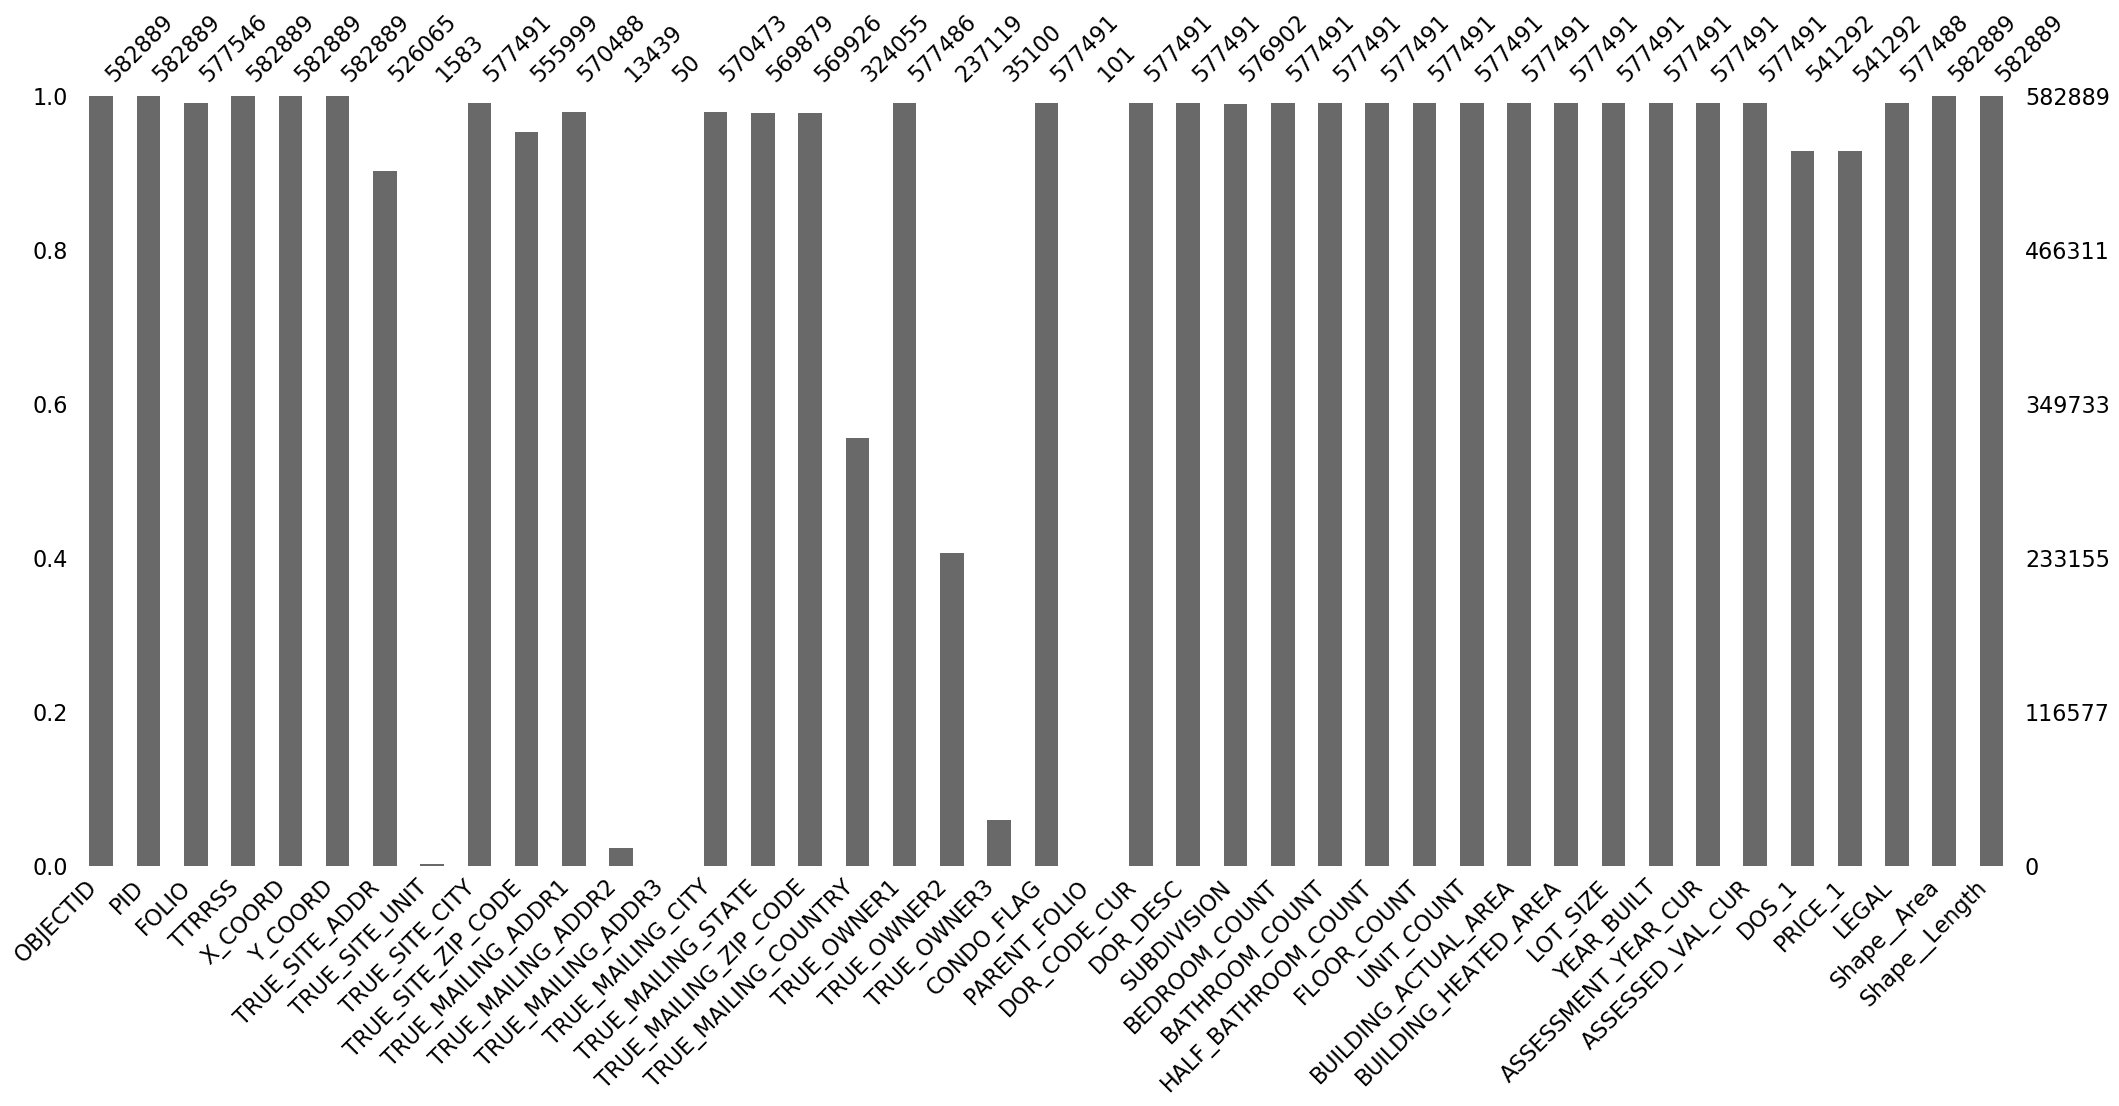

In [26]:
## Using missingno.matrix to visualize our dataframe as a matrix of missing values.
## We can also use bar, heatmap, dendrogram

msno.matrix(result)
plt.show()

In [17]:
## Let's check whether we can find the unique identifier FOLIO from an arbitrary search using loopnet.com
## url: https://www.loopnet.com/Listing/8163-NE-2nd-Ave-Miami-FL/24995552/

## We want to check a commercial property at 8163 ne 2nd ave with folio number: 01-3207-014-0120.
## Here, we need to omit any leading 0's




test_folio_1 = 132070140120
test_commercial_1 = result[result['FOLIO'] == test_folio_1]
test_commercial_1


,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
27970,27971,110543,1.320701e+11,534207,921689.1,551851.6,8163 NE 2 AVE,NaN,Miami,33138-4420,3330 NE 190 ST 2614,NaN,NaN,AVENTURA,FL,33180,USA,8163 URBAN WAREHOUSE LLC,NaN,NaN,N,NaN,1111.0,STORE : RETAIL OUTLET,13207014.0,0.0,0.0,0.0,2.0,0.0,14911.0,14911.0,9370.0,1947.0,2022.0,1400000.0,20190905.0,1900000.0,VIRGINIA PARK PB 10-43 LOT 20 & 21 LESS S36FT ...,1121.308594,133.961157


In [19]:
## Let's do another test on the current building that I'm living in, just to make sure everything checks out


## We want to check a residential building at 4250 Biscayne Blvd with folio number: 01-3219-051-0010.
## Here, we need to omit any leading 0's
## 13219051001

test_folio_2_range_1 = 132190510000
test_folio_2_range_2 = 132190520000
test_folio_2_parcel = 132190510840
test_apartment_1_parcels = result[(result['FOLIO'] > test_folio_2_range_1) & (result['FOLIO'] < test_folio_2_range_2)]
test_apartment_1_parcels

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
31845,31846,117475,1.321905e+11,534219,922886.5,539493.1,4250 BISCAYNE BLVD,NaN,Miami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REFERENCE ONLY,NaN,NaN,N,NaN,0.0,REFERENCE FOLIO,13219051.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,0.0,NaN,NaN,4250 BISCAYNE BOULEVARD CONDO AAA PROPERTY PB ...,4553.746094,309.527454


In [25]:
## Let's check to see if there's any other parcel's that have the same relative composition (first 9 numbers are the same)

test_apartment_1_parcel = result[result['FOLIO'] == test_folio_2_parcel]
print(test_apartment_1_parcel)

Empty DataFrame
Columns: [OBJECTID, PID, FOLIO, TTRRSS, X_COORD, Y_COORD, TRUE_SITE_ADDR, TRUE_SITE_UNIT, TRUE_SITE_CITY, TRUE_SITE_ZIP_CODE, TRUE_MAILING_ADDR1, TRUE_MAILING_ADDR2, TRUE_MAILING_ADDR3, TRUE_MAILING_CITY, TRUE_MAILING_STATE, TRUE_MAILING_ZIP_CODE, TRUE_MAILING_COUNTRY, TRUE_OWNER1, TRUE_OWNER2, TRUE_OWNER3, CONDO_FLAG, PARENT_FOLIO, DOR_CODE_CUR, DOR_DESC, SUBDIVISION, BEDROOM_COUNT, BATHROOM_COUNT, HALF_BATHROOM_COUNT, FLOOR_COUNT, UNIT_COUNT, BUILDING_ACTUAL_AREA, BUILDING_HEATED_AREA, LOT_SIZE, YEAR_BUILT, ASSESSMENT_YEAR_CUR, ASSESSED_VAL_CUR, DOS_1, PRICE_1, LEGAL, Shape__Area, Shape__Length]
Index: []


In [26]:
## Let's check to see if there's any other parcel's at this address

address_1 = '4250 BISCAYNE BLVD'
test_apartment_1_addresses = result[result['TRUE_SITE_ADDR'] == address_1]
print(test_apartment_1_addresses)

if (test_apartment_1_addresses.shape[0] == 1): 
    print('Only one')

## Unforutnately, it seems that our apartment data from this dataset is relatively useless, as it only specifies
## the reference 

       OBJECTID     PID         FOLIO  TTRRSS   X_COORD   Y_COORD  \
31845     31846  117475  1.321905e+11  534219  922886.5  539493.1   

           TRUE_SITE_ADDR TRUE_SITE_UNIT TRUE_SITE_CITY TRUE_SITE_ZIP_CODE  \
31845  4250 BISCAYNE BLVD            NaN          Miami                NaN   

      TRUE_MAILING_ADDR1 TRUE_MAILING_ADDR2 TRUE_MAILING_ADDR3  \
31845                NaN                NaN                NaN   

      TRUE_MAILING_CITY TRUE_MAILING_STATE TRUE_MAILING_ZIP_CODE  \
31845               NaN                NaN                   NaN   

      TRUE_MAILING_COUNTRY     TRUE_OWNER1 TRUE_OWNER2 TRUE_OWNER3 CONDO_FLAG  \
31845                  NaN  REFERENCE ONLY         NaN         NaN          N   

       PARENT_FOLIO  DOR_CODE_CUR         DOR_DESC  SUBDIVISION  \
31845           NaN           0.0  REFERENCE FOLIO   13219051.0   

       BEDROOM_COUNT  BATHROOM_COUNT  HALF_BATHROOM_COUNT  FLOOR_COUNT  \
31845            0.0             0.0                  0.0     

In [27]:
## Let's check the distribution of unit's in our parcel's pertaining to multi-family properties with more than 4 units

multifamily = result[result['DOR_DESC'].str.find("MULTIFAMILY") > -1]
multifamily.describe()
##result[result['DOR_DESC'] == ]

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,PARENT_FOLIO,DOR_CODE_CUR,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,Shape__Area,Shape__Length
count,35329.000000,35329.000000,3.532900e+04,35329.000000,35329.000000,35329.000000,0.0,35329.000000,3.530400e+04,35329.000000,35329.000000,35329.000000,35329.000000,35329.000000,3.532900e+04,3.532900e+04,3.532900e+04,35329.000000,35329.0,3.532900e+04,3.455200e+04,3.455200e+04,35329.000000,35329.000000
mean,126078.686546,282431.920236,1.015559e+12,538783.413938,903820.486159,530261.456107,NaN,766.748592,1.015051e+08,11.667072,9.113023,0.164284,1.387189,7.701945,7.714002e+03,8.001652e+03,1.399219e+04,1959.305471,2022.0,9.040254e+05,2.009937e+07,9.342810e+05,1584.240528,144.222533
std,122621.814653,167640.900509,1.239212e+12,10168.715252,22805.764998,31778.261853,NaN,362.763530,1.239029e+08,80.923876,41.201247,3.164624,1.290212,30.500989,4.217871e+04,4.229270e+04,4.886640e+04,20.481225,0.0,4.652595e+06,1.101724e+05,6.764059e+06,5581.277789,106.624258
min,64.000000,10.000000,1.010104e+11,514132.000000,801721.100000,388364.000000,NaN,303.000000,1.010104e+07,0.000000,0.000000,0.000000,0.000000,0.000000,4.320000e+02,0.000000e+00,0.000000e+00,1901.000000,2022.0,7.937000e+03,1.962013e+07,0.000000e+00,29.632812,21.830944
25%,37163.000000,136472.000000,1.410201e+11,534113.000000,895496.600000,519848.100000,NaN,802.000000,1.410200e+07,4.000000,2.000000,0.000000,1.000000,2.000000,1.819000e+03,1.723000e+03,6.000000e+03,1947.000000,2022.0,2.211200e+05,2.004030e+07,1.000000e+02,676.005859,112.721035
50%,68293.000000,279375.000000,2.320201e+11,534207.000000,907641.300000,530222.300000,NaN,802.000000,2.320201e+07,4.000000,3.000000,0.000000,1.000000,2.000000,2.290000e+03,2.250000e+03,7.150000e+03,1957.000000,2022.0,3.170800e+05,2.014012e+07,7.750000e+04,816.248047,125.706038
75%,202453.000000,422784.000000,2.540060e+12,544106.000000,916987.600000,549597.300000,NaN,802.000000,2.540060e+08,6.000000,4.000000,0.000000,2.000000,4.000000,3.000000e+03,3.220000e+03,9.153000e+03,1971.000000,2022.0,4.689180e+05,2.018122e+07,3.300000e+05,1047.089844,137.968794
max,579712.000000,659196.000000,3.660100e+12,583809.000000,945553.300000,597282.200000,NaN,8903.000000,3.660100e+08,12590.000000,2066.000000,248.000000,50.000000,1227.000000,1.680493e+06,1.680493e+06,2.285158e+06,2021.000000,2022.0,1.441311e+08,2.022031e+07,2.550000e+08,265927.533203,3290.104395


In [32]:
## We can see here, we have more than one multi-family building with 0 units
plt.hist(multifamily['UNIT_COUNT'], range = (0, 50))

(array([28786.,  2936.,  1284.,   489.,   416.,   141.,   159.,    96.,
          100.,    94.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

In [33]:
## We have about 48 multifamily properites with 0 units.... Not very reliable
multifamily[multifamily['UNIT_COUNT'] == 0].shape[0]

48

In [34]:
## Let's check the address of my old house, by checking the TRUE_SITE_ADDR 

address_2 = "12371 SW 97 TER"
result[result['TRUE_SITE_ADDR'] == address_2]

## A lot of memories come back, seeing old pictures of my house

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
410036,410037,537676,3.059010e+12,553901,855178.9,488960.4,12371 SW 97 TER,NaN,Unincorporated County,33186-2532,12371 SW 97 TER,NaN,NaN,MIAMI,FL,33186,USA,JOHN ANGEL MATTHEW IBARRA,CLAUDIA INES RODRIGUEZ,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,305901023.0,4.0,4.0,0.0,1.0,1.0,4418.0,2730.0,15006.0,1998.0,2022.0,582768.0,20191218.0,740000.0,CLASCA-ROBAINA SUB PB 118-23 LOT 11 BLK 2 LOT ...,1664.246094,163.191769


In [35]:
## Checking to see what kinds of information is held for Single Family 
## Residential-Total Value

code104 = DataFrameSummary(result[result['DOR_CODE_CUR'] == 104])
code104["BATHROOM_COUNT"]

mean                                                                 2.411448
std                                                                  0.709482
variance                                                             0.503365
min                                                                       0.0
max                                                                       9.0
mode                                                                      2.0
5%                                                                        2.0
25%                                                                       2.0
50%                                                                       2.0
75%                                                                       3.0
95%                                                                       4.0
iqr                                                                       1.0
kurtosis                                                        

In [36]:
result.describe(include = 'all')

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
count,582889.000000,582889.000000,5.775460e+05,582889.000000,582889.000000,582889.000000,526065,1583,577491,555999,570488,13439,50,570473,569879,569926,324055,577486,237119,35100,577491,1.010000e+02,577491.000000,577491,5.769020e+05,577491.000000,577491.000000,577491.000000,577491.000000,577491.000000,5.774910e+05,5.774910e+05,5.774910e+05,577491.000000,577491.0,5.774910e+05,5.412920e+05,5.412920e+05,577488,5.828890e+05,582889.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,523273,481,35,130388,442231,458,12,3550,65,88671,70,450224,188684,29929,2,NaN,NaN,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572265,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,3501 RICKENBACKER CSWY,A,Unincorporated County,33178-0000,2975 HORSESHOE DR SOUTH,SUITE 800,** CONFIDENTIAL **,MIAMI,FL,33186,USA,REFERENCE ONLY,EVERGLADES NATL PARK,STATE 2 LLC,N,NaN,NaN,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANDARIN LAKES PB 163-40 T-21633 ALL TRACTS LA...,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,45,92,297545,4302,11659,11651,30,322890,553225,11886,323172,6881,6985,227,577390,NaN,NaN,316360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN
mean,291445.000000,300316.601344,2.235410e+12,542848.072245,877507.865002,514033.625700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.977439e+12,952.730785,NaN,2.235657e+08,3.333602,2.272760,0.117697,1.202026,1.424244,3.734543e+03,3.429380e+03,2.126237e+05,1734.251860,2022.0,5.547764e+05,2.009173e+07,5.230142e+05,NaN,1.038530e+04,192.054330
std,168265.704866,175568.069419,1.262499e+12,15423.111114,34033.632947,50473.093224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.314177e+12,2259.453606,NaN,1.262552e+08,21.812396,12.370458,1.284018,45.819677,12.287100,3.058075e+04,3.011407e+04,1.100871e+07,670.501893,0.0,4.942663e+06,1.149526e+05,3.809344e+06,NaN,4.874475e+05,473.993822
min,1.000000,1.000000,0.000000e+00,514131.000000,698060.100000,293562.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411502e+11,0.000000,NaN,1.010000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2022.0,0.000000e+00,1.923032e+07,0.000000e+00,NaN,6.699219e-01,6.448753
25%,145723.000000,148968.000000,7.220703e+11,534012.000000,852810.200000,480836.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300205e+11,101.000000,NaN,7.220703e+07,2.000000,1.000000,0.000000,1.000000,1.000000,1.349000e+03,1.197000e+03,5.000000e+03,1950.000000,2022.0,1.295710e+05,2.002110e+07,1.000000e+02,NaN,5.843770e+02,103.755297
50%,291445.000000,298636.000000,3.040120e+12,543934.000000,876697.900000,516505.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.040181e+12,101.000000,NaN,3.040120e+08,3.000000,2.000000,0.000000,1.000000,1.000000,1.892000e+03,1.620000e+03,7.500000e+03,1966.000000,2022.0,2.170050e+05,2.013080e+07,1.200000e+05,NaN,8.531758e+02,121.293998
75%,437167.000000,447941.000000,3.059210e+12,553923.000000,904433.000000,555320.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.122140e+12,410.000000,NaN,3.059210e+08,4.000000,2.000000,0.000000,1.000000,1.000000,2.570000e+03,2.169000e+03,1.035000e+04,1990.000000,2022.0,3.333455e+05,2.018112e+07,3.150000e+05,NaN,1.228004e+03,146.323743


In [37]:
result.columns

Index(['OBJECTID', 'PID', 'FOLIO', 'TTRRSS', 'X_COORD', 'Y_COORD',
       'TRUE_SITE_ADDR', 'TRUE_SITE_UNIT', 'TRUE_SITE_CITY',
       'TRUE_SITE_ZIP_CODE', 'TRUE_MAILING_ADDR1', 'TRUE_MAILING_ADDR2',
       'TRUE_MAILING_ADDR3', 'TRUE_MAILING_CITY', 'TRUE_MAILING_STATE',
       'TRUE_MAILING_ZIP_CODE', 'TRUE_MAILING_COUNTRY', 'TRUE_OWNER1',
       'TRUE_OWNER2', 'TRUE_OWNER3', 'CONDO_FLAG', 'PARENT_FOLIO',
       'DOR_CODE_CUR', 'DOR_DESC', 'SUBDIVISION', 'BEDROOM_COUNT',
       'BATHROOM_COUNT', 'HALF_BATHROOM_COUNT', 'FLOOR_COUNT', 'UNIT_COUNT',
       'BUILDING_ACTUAL_AREA', 'BUILDING_HEATED_AREA', 'LOT_SIZE',
       'YEAR_BUILT', 'ASSESSMENT_YEAR_CUR', 'ASSESSED_VAL_CUR', 'DOS_1',
       'PRICE_1', 'LEGAL', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [38]:
## Let's find the Classification's (Residential, Commercial....) that are relevant to our study

result['DOR_DESC']

result.describe()

types = []
to_drop = []
for prop in result['DOR_DESC'].unique():
    
    if isinstance(prop, (int,float)):
        to_drop.append(prop)
        continue;
    
    elif prop.find('RESIDENTIAL') != -1:
        types.append(prop)
        
    else:
        to_drop.append(prop)

#print(f'types: {types}')
#print()
#print(f'to_drop: {to_drop}')

##result = result['DOR_DESC' != ]

In [39]:
## Here are the list of supposed DOR_DESC tags that are residential

types = sorted(types)
for a in types: print (a)

COUNTY : RESIDENTIAL - SINGLE FAMILY
IMPR AGRI - NOT HOMESITES : MIXED USE - RESIDENTIAL
IMPR AGRI : RESIDENTIAL - SINGLE FAMILY
MISCELLANEOUS - RESIDENTIAL : CAMPSITE
MISCELLANEOUS - RESIDENTIAL : MIXED USE - RESIDENTIAL
MIXED USE-STORE/RESIDENTIAL : MIXED USE - COMMERCIAL
MIXED USE-STORE/RESIDENTIAL : MIXED USE - RESIDENTIAL
MIXED USE-STORE/RESIDENTIAL : RETAIL OUTLET
PARKING GARAGE - RESIDENTIAL CONDO
RESIDENTIAL - SINGLE FAMILY : 1 UNIT
RESIDENTIAL - SINGLE FAMILY : ADDITIONAL LIVING QUARTERS
RESIDENTIAL - SINGLE FAMILY : CLUSTER HOME
RESIDENTIAL - SINGLE FAMILY : RESIDENTIAL - TOTAL VALUE
RESIDENTIAL - TOTAL VALUE : COMMERCIAL - TOTAL VALUE
RESIDENTIAL - TOTAL VALUE : CONDOMINIUM - RESIDENTIAL
RESIDENTIAL - TOTAL VALUE : DOCK - TOTAL VALUE
RESIDENTIAL - TOTAL VALUE : TOWNHOUSE
RESIDENTIAL - TOTAL VALUE : TOWNHOUSE W/ ADDITIONAL LIVING QUARTERS
VACANT RESIDENTIAL : CLUSTER HOME
VACANT RESIDENTIAL : EXTRA FEA OTHER THAN PARKING
VACANT RESIDENTIAL : RESIDENTIAL - TOTAL VALUE
VACANT R

In [40]:
result['DOR_DESC'].isin(types)

0         False
1         False
2         False
3         False
4         False
          ...  
582884     True
582885     True
582886    False
582887     True
582888     True
Name: DOR_DESC, Length: 582889, dtype: bool

In [41]:
residential = result.loc[result['DOR_DESC'].isin(types)]
residential

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
27,28,269265,1.010000e+11,534126,914202.3,532050.4,1250 NW 21 ST,NaN,Miami,33142-7753,401 WILSHIRE BLVD #1070,NaN,NaN,SANTA MONICA,CA,90401,USA,SANTA CLARA APARTMENTS I LLC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10100000.0,0.0,352.0,0.0,9.0,208.0,169280.0,169280.0,0.0,2003.0,2022.0,5900000.0,NaN,NaN,SANTA CLARA STATION PB 126-42 PORT OF TRACT A ...,163.781250,51.295338
59,60,357304,1.010104e+11,534136,919413.8,528080.9,1034 NW 3 AVE,NaN,Miami,33136-3308,5080A BISCAYNE BLVD,NaN,NaN,MIAMI,FL,33137-3218,NaN,LION 1034 LLC,NaN,NaN,N,NaN,1209.0,MIXED USE-STORE/RESIDENTIAL : MIXED USE - RESI...,10101040.0,7.0,7.0,0.0,2.0,7.0,7450.0,7450.0,5000.0,1950.0,2022.0,666193.0,20160303.0,700000.0,MIAMI NORTH PB B-41 S50FT OF N100FT LOTS 1 & 2...,553.693359,99.129631
69,70,480624,1.010105e+11,534136,919913.8,528141.7,212 NW 11 ST,NaN,Miami,33136-0000,119 NW 47 TER,NaN,NaN,MIAMI,FL,33127,USA,COMPLEX TRANSACTIONS LLC,NaN,NaN,N,NaN,1209.0,MIXED USE-STORE/RESIDENTIAL : MIXED USE - RESI...,10101050.0,0.0,0.0,0.0,2.0,0.0,2551.0,2439.0,3750.0,1958.0,2022.0,414472.0,20160909.0,10000.0,MIAMI NORTH PB B-41 W25FT OF N75FT OF LOT 2 & ...,404.457031,81.626154
118,119,356990,1.010108e+11,534136,921447.4,528177.2,1035 N MIAMI AVE,NaN,Miami,33132-3514,2430 INAGUA AVE,NaN,NaN,MIAMI,FL,33133,NaN,1035 N MIA AVE LLC,NaN,NaN,N,NaN,1229.0,MIXED USE-STORE/RESIDENTIAL : MIXED USE - COMM...,10101080.0,0.0,0.0,0.0,4.0,0.0,23844.0,23844.0,5000.0,1920.0,2022.0,2062621.0,20040701.0,1630000.0,MIAMI NORTH PB B-41 N125FT OF LOT 10 BLK 18 LO...,540.683594,114.273510
203,204,517284,1.010208e+11,534136,918901.5,527668.7,410 NW 10 ST,NaN,Miami,33136-3321,605 LINCOLN RD 250,NaN,NaN,MIAMI BEACH,FL,33139,USA,A FRAME INVESTMENTS LLC,NaN,NaN,N,NaN,81.0,VACANT RESIDENTIAL : VACANT LAND,10102080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2050.0,0.0,2022.0,32800.0,20190118.0,12400.0,MIAMI NORTH PB B-41 PORT OF LOT 1 DESC BEG SE ...,223.535156,69.572362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582883,582884,358871,3.660170e+12,564017,869794.7,446500.9,22219 SW 99 CT,NaN,Cutler Bay,33190-1562,22219 SW 99 CT,NaN,NaN,MIAMI,FL,33190-1562,NaN,WENDRA LAURRAINE KIRBY,NaN,NaN,N,NaN,105.0,RESIDENTIAL - SINGLE FAMILY : CLUSTER HOME,366017016.0,3.0,2.0,0.0,1.0,1.0,1407.0,1383.0,3383.0,1991.0,2022.0,91270.0,19930601.0,74000.0,LAKES BY THE BAY SEC 6 PB 135-73 LOT 29 BLK 22...,532.130859,92.317590
582884,582885,444345,3.660170e+12,564017,869791.7,446562.5,22211 SW 99 CT,NaN,Cutler Bay,33190-1562,22211 SW 99 CT,NaN,NaN,CUTLER BAY,FL,33190,USA,VENTURA GUANCH JR,MERCEDES GUANCH,NaN,N,NaN,105.0,RESIDENTIAL - SINGLE FAMILY : CLUSTER HOME,366017016.0,3.0,2.0,0.0,1.0,1.0,1407.0,1383.0,3385.0,1991.0,2022.0,125151.0,20160907.0,231500.0,LAKES BY THE BAY SEC 6 PB 135-73 LOT 30 BLK 22...,412.681641,83.054289
582885,582886,287842,3.660170e+12,564017,869793.2,446625.3,22203 SW 99 CT,NaN,Cutler Bay,33190-1562,22203 SW 99 CT,NaN,NaN,CUTLER BAY,FL,33190,USA,RANDALL UJUETA JTRS,BRITNEY GOMEZ JTRS,NaN,N,NaN,105.0,RESIDENTIAL - SINGLE FAMILY : CLUSTER HOME,366017016.0,3.0,2.0,0.0,1.0,1.0,1684.0,1412.0,6786.0,1991.0,2022.0,165827.0,20141226.0,69500.0,LAKES BY THE BAY SEC 6 PB 135-73 LOT 31 BLK 22...,589.111328,106.894303
582887,582888,290881,3.660170e+12,564017,869022.3,446397.7,10051 SW 223 ST,NaN,Cutler Bay,33190-1575,10051 SW 223 ST,NaN,NaN,CUTL

In [42]:
## Residential - Single Family: 1 Unit Houses make up more than half of all properties in Miami-Dade County

residential['DOR_DESC'].value_counts()

RESIDENTIAL - SINGLE FAMILY : 1 UNIT                                   316360
RESIDENTIAL - TOTAL VALUE : TOWNHOUSE                                   58592
RESIDENTIAL - SINGLE FAMILY : CLUSTER HOME                              42976
RESIDENTIAL - SINGLE FAMILY : RESIDENTIAL - TOTAL VALUE                 21349
VACANT RESIDENTIAL : VACANT LAND                                        10177
IMPR AGRI : RESIDENTIAL - SINGLE FAMILY                                  1930
VACANT RESIDENTIAL : EXTRA FEA OTHER THAN PARKING                        1482
RESIDENTIAL - SINGLE FAMILY : ADDITIONAL LIVING QUARTERS                  919
MIXED USE-STORE/RESIDENTIAL : MIXED USE - RESIDENTIAL                     892
MIXED USE-STORE/RESIDENTIAL : MIXED USE - COMMERCIAL                      354
RESIDENTIAL - TOTAL VALUE : TOWNHOUSE W/ ADDITIONAL LIVING QUARTERS       303
MIXED USE-STORE/RESIDENTIAL : RETAIL OUTLET                               193
COUNTY : RESIDENTIAL - SINGLE FAMILY                            

In [81]:
## Let's go ahead and dive into our single family real-estate properties and export them into tableau!

single_family = residential[residential['DOR_DESC'] == 'RESIDENTIAL - SINGLE FAMILY : 1 UNIT']
single_family

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
27,28,269265,1.010000e+11,534126,914202.3,532050.4,1250 NW 21 ST,NaN,Miami,33142-7753,401 WILSHIRE BLVD #1070,NaN,NaN,SANTA MONICA,CA,90401,USA,SANTA CLARA APARTMENTS I LLC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10100000.0,0.0,352.0,0.0,9.0,208.0,169280.0,169280.0,0.0,2003.0,2022.0,5900000.0,NaN,NaN,SANTA CLARA STATION PB 126-42 PORT OF TRACT A ...,163.781250,51.295338
205,206,360730,1.010208e+11,534136,918556.0,527704.1,460 NW 10 ST,NaN,Miami,33136-3321,460 NW 10 ST,NaN,NaN,MIAMI,FL,33136-3321,NaN,WILLIE JAMES PERRY &W ALMA,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,3.0,1.0,0.0,1.0,1.0,1093.0,1093.0,7500.0,1953.0,2022.0,165203.0,NaN,NaN,MIAMI NORTH PB B-41 LOT 8 BLK 28 LOT SIZE 7500...,883.316406,135.836805
206,207,148065,1.010208e+11,534136,918516.6,527726.8,464 NW 10 ST,NaN,Miami,33136-3321,175 SW 7 ST SUITE #1518,NaN,NaN,MIAMI,FL,33130,USA,SYNERGY CONSULTANTS GROUP LLC TRS,LAND TRUST SCG723,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,1.0,1.0,0.0,1.0,1.0,901.0,901.0,2500.0,1925.0,2022.0,48835.0,20190724.0,60100.0,MIAMI NORTH PB B-41 N100FT OF E25FT LOT 9 BLK ...,287.648438,84.940715
249,250,556344,1.010407e+11,534136,919060.1,527008.6,733 NW 4 AVE,NaN,Miami,33136-3808,4775 COLLINS AVE # 3504,NaN,NaN,MIAMI BEACH,FL,33140,USA,J AND O PROPERTY 1 LLC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,2022.0,182948.0,20190717.0,200000.0,MIAMI NORTH PB B-41 N25FT OF S75FT OF LOTS 9 &...,271.453125,82.556798
255,256,124471,1.010407e+11,534136,919190.6,526877.5,353 NW 7 ST,NaN,Miami,33136-3815,8375 NW 15 AVE,NaN,NaN,MIAMI,FL,33147,USA,FRANKIE MARIE LEE,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,2.0,1.0,2.0,1.0,1710.0,2280.0,7500.0,1940.0,2022.0,406976.0,20161103.0,0.0,MIAMI NORTH PB B-41 LOT 14 BLK 47 LOT SIZE 50....,922.111328,137.556989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579939,579940,413806,3.660100e+12,564010,880476.9,452199.3,20601 SW 79 CT,NaN,Cutler Bay,33189-0000,20601 SW 79 CT,NaN,NaN,CUTLER BAY,FL,33189,USA,ARIEL ARMANDO NUNEZ,VIDA C NIETO BALUJA,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,11537.0,2019.0,2022.0,524793.0,20191216.0,602700.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 9 BLK...,1322.830078,155.214602
579940,579941,269752,3.660100e+12,564010,880507.5,452125.1,20621 SW 79 CT,NaN,Cutler Bay,33189-0000,20621 SW 79 CT,NaN,NaN,CUTLER BAY,FL,33189,USA,JORGE CEBALLOS CORDERO,YAIMA GOMEZ ACOSTA,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,4.0,4.0,0.0,2.0,1.0,3583.0,2600.0,9327.0,2018.0,2022.0,365373.0,20220131.0,100.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 10 BL...,1098.792969,149.506911
579941,579942,415651,3.660100e+12,564010,880479.7,452038.3,20641 SW 79 CT,NaN,Cutler Bay,33189-0000,20641 SW 79 CT,NaN,NaN,CUTLER BAY,FL,33189,USA,ALEXIS ZAMUDIO,ORLANDO ALFONSO VANEGAS,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,4.0,4.0,1.0,2.0,1.0,3682.0,2740.0,10346.0,2019.0,2022.0,425452.0,20191115.0,579900.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 11 BL...,1205.316406,147.459041
579942,579943,336106,3.660100e+12,564010,880399.1,452003.5,20661 SW 79 CT,NaN,Cutler Bay,33189-0000,20661 SW 79TH CT,NaN,NaN,CUTL

In [82]:
## Let's describe our single_family  data using datatile's package

single_family_info = DataFrameSummary(single_family)
single_family_info.summary()

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
count,316360.0,316360.0,316360.0,316360.0,316360.0,316360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,316360.0,NaN,316269.0,316360.0,316360.0,316360.0,316360.0,316360.0,316360.0,316360.0,316360.0,316360.0,316360.0,316360.0,310277.0,310277.0,NaN,316360.0,316360.0
mean,281517.629052,286961.393087,2195419944270.006592,540643.25232,884933.464494,521334.043413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,219551428.328603,3.213077,1.99359,0.096782,1.224646,1.006132,2281.02941,1899.148995,10488.731792,1967.350654,2022.0,337465.027987,20085539.341824,262425.293383,NaN,1185.813859,135.648988
std,164470.902274,169344.639175,1270004481138.133545,14307.639936,28441.27056,46754.762114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,126997752.388679,0.877708,1.116576,0.397508,50.538921,0.375842,1270.206231,1048.818709,52003.950125,28.96781,0.0,710656.900556,117828.172419,869375.088319,NaN,1567.411631,50.329065
min,28.0,3.0,101000000026.0,514132.0,800798.9,386790.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,10100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1901.0,2022.0,11763.0,19270401.0,0.0,NaN,7.6875,15.160575
25%,136165.75,139106.25,621260162207.5,524219.0,864646.075,489954.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,62126016.0,3.0,1.0,0.0,1.0,1.0,1560.0,1324.0,6512.0,1953.0,2022.0,143642.5,20010901.0,100.0,NaN,735.379883,113.53418
50%,274379.5,285542.0,3032060280155.0,543928.0,886566.3,519163.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,303206028.0,3.0,2.0,0.0,1.0,1.0,2002.0,1673.0,7875.0,1961.0,2022.0,219623.0,20121205.0,105000.0,NaN,899.296875,123.422789
75%,422770.25,428337.0,3059090400142.5,553909.0,907461.225,561718.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,305909040.0,4.0,2.0,0.0,1.0,1.0,2632.0,2158.0,10088.0,1981.0,2022.0,332432.0,20180925.0,298000.0,NaN,1159.493652,140.547298
max,579944.0,659993.0,3660100360010.0,583909.0,945682.2,597544.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,366010036.0,32.0,352.0,100.0,20101.0,208.0,169280.0,169280.0,27872098.0,9999.0,2022.0,46342551.0,20220713.0,88000000.0,NaN,250980.779297,2137.004227
counts,316360,316360,316360,316360,316360,316360,316346,90,316360,314311,316360,254,23,316355,316170,316188,174115,316360,131064,22155,316360,0,316360,316360,316269,316360,316360,316360,316360,316360,316360,316360,316360,316360,316360,316360,310277,310277,316360,316360,316360
uniques,316360,316360,316269,476,271738,283265,316123,35,35,81457,292763,122,7,2076,61,64528,46,287492,123543,20852,1,0,1,1,8239,18,25,8,13,5,8642,7527,29468,119,1,227324,6299,11562,316171,244740,316337


In [83]:
single_family.head()

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,TRUE_SITE_ADDR,TRUE_SITE_UNIT,TRUE_SITE_CITY,TRUE_SITE_ZIP_CODE,TRUE_MAILING_ADDR1,TRUE_MAILING_ADDR2,TRUE_MAILING_ADDR3,TRUE_MAILING_CITY,TRUE_MAILING_STATE,TRUE_MAILING_ZIP_CODE,TRUE_MAILING_COUNTRY,TRUE_OWNER1,TRUE_OWNER2,TRUE_OWNER3,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
27,28,269265,1.010000e+11,534126,914202.3,532050.4,1250 NW 21 ST,NaN,Miami,33142-7753,401 WILSHIRE BLVD #1070,NaN,NaN,SANTA MONICA,CA,90401,USA,SANTA CLARA APARTMENTS I LLC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10100000.0,0.0,352.0,0.0,9.0,208.0,169280.0,169280.0,0.0,2003.0,2022.0,5900000.0,NaN,NaN,SANTA CLARA STATION PB 126-42 PORT OF TRACT A ...,163.781250,51.295338
205,206,360730,1.010208e+11,534136,918556.0,527704.1,460 NW 10 ST,NaN,Miami,33136-3321,460 NW 10 ST,NaN,NaN,MIAMI,FL,33136-3321,NaN,WILLIE JAMES PERRY &W ALMA,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,3.0,1.0,0.0,1.0,1.0,1093.0,1093.0,7500.0,1953.0,2022.0,165203.0,NaN,NaN,MIAMI NORTH PB B-41 LOT 8 BLK 28 LOT SIZE 7500...,883.316406,135.836805
206,207,148065,1.010208e+11,534136,918516.6,527726.8,464 NW 10 ST,NaN,Miami,33136-3321,175 SW 7 ST SUITE #1518,NaN,NaN,MIAMI,FL,33130,USA,SYNERGY CONSULTANTS GROUP LLC TRS,LAND TRUST SCG723,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,1.0,1.0,0.0,1.0,1.0,901.0,901.0,2500.0,1925.0,2022.0,48835.0,20190724.0,60100.0,MIAMI NORTH PB B-41 N100FT OF E25FT LOT 9 BLK ...,287.648438,84.940715
249,250,556344,1.010407e+11,534136,919060.1,527008.6,733 NW 4 AVE,NaN,Miami,33136-3808,4775 COLLINS AVE # 3504,NaN,NaN,MIAMI BEACH,FL,33140,USA,J AND O PROPERTY 1 LLC,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,2022.0,182948.0,20190717.0,200000.0,MIAMI NORTH PB B-41 N25FT OF S75FT OF LOTS 9 &...,271.453125,82.556798
255,256,124471,1.010407e+11,534136,919190.6,526877.5,353 NW 7 ST,NaN,Miami,33136-3815,8375 NW 15 AVE,NaN,NaN,MIAMI,FL,33147,USA,FRANKIE MARIE LEE,NaN,NaN,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,2.0,1.0,2.0,1.0,1710.0,2280.0,7500.0,1940.0,2022.0,406976.0,20161103.0,0.0,MIAMI NORTH PB B-41 LOT 14 BLK 47 LOT SIZE 50....,922.111328,137.556989


In [79]:
## For now, all of our columns are significant

## Let's drop the columns that are irrelevant to the data that will be required
##single_family_columns_to_drop = single_family.columns[6:20]
##print(single_family_columns_to_drop)


##single_family = single_family.drop(single_family_columns_to_drop, axis = 1)
##single_family

Index(['TRUE_SITE_ADDR', 'TRUE_SITE_UNIT', 'TRUE_SITE_CITY',
       'TRUE_SITE_ZIP_CODE', 'TRUE_MAILING_ADDR1', 'TRUE_MAILING_ADDR2',
       'TRUE_MAILING_ADDR3', 'TRUE_MAILING_CITY', 'TRUE_MAILING_STATE',
       'TRUE_MAILING_ZIP_CODE', 'TRUE_MAILING_COUNTRY', 'TRUE_OWNER1',
       'TRUE_OWNER2', 'TRUE_OWNER3'],
      dtype='object')


,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
27,28,269265,1.010000e+11,534126,914202.3,532050.4,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10100000.0,0.0,352.0,0.0,9.0,208.0,169280.0,169280.0,0.0,2003.0,2022.0,5900000.0,NaN,NaN,SANTA CLARA STATION PB 126-42 PORT OF TRACT A ...,163.781250,51.295338
205,206,360730,1.010208e+11,534136,918556.0,527704.1,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,3.0,1.0,0.0,1.0,1.0,1093.0,1093.0,7500.0,1953.0,2022.0,165203.0,NaN,NaN,MIAMI NORTH PB B-41 LOT 8 BLK 28 LOT SIZE 7500...,883.316406,135.836805
206,207,148065,1.010208e+11,534136,918516.6,527726.8,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,1.0,1.0,0.0,1.0,1.0,901.0,901.0,2500.0,1925.0,2022.0,48835.0,20190724.0,60100.0,MIAMI NORTH PB B-41 N100FT OF E25FT LOT 9 BLK ...,287.648438,84.940715
249,250,556344,1.010407e+11,534136,919060.1,527008.6,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,2022.0,182948.0,20190717.0,200000.0,MIAMI NORTH PB B-41 N25FT OF S75FT OF LOTS 9 &...,271.453125,82.556798
255,256,124471,1.010407e+11,534136,919190.6,526877.5,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,2.0,1.0,2.0,1.0,1710.0,2280.0,7500.0,1940.0,2022.0,406976.0,20161103.0,0.0,MIAMI NORTH PB B-41 LOT 14 BLK 47 LOT SIZE 50....,922.111328,137.556989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579939,579940,413806,3.660100e+12,564010,880476.9,452199.3,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,11537.0,2019.0,2022.0,524793.0,20191216.0,602700.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 9 BLK...,1322.830078,155.214602
579940,579941,269752,3.660100e+12,564010,880507.5,452125.1,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,4.0,4.0,0.0,2.0,1.0,3583.0,2600.0,9327.0,2018.0,2022.0,365373.0,20220131.0,100.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 10 BL...,1098.792969,149.506911
579941,579942,415651,3.660100e+12,564010,880479.7,452038.3,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,4.0,4.0,1.0,2.0,1.0,3682.0,2740.0,10346.0,2019.0,2022.0,425452.0,20191115.0,579900.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 11 BL...,1205.316406,147.459041
579942,579943,336106,3.660100e+12,564010,880399.1,452003.5,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,10690.0,2018.0,2022.0,395406.0,20180531.0,549900.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 12 BL...,1199.578125,163.027157


In [87]:
single_family.ASSESSED_VAL_CUR.describe()

count    3.163600e+05
mean     3.374650e+05
std      7.106569e+05
min      1.176300e+04
25%      1.436425e+05
50%      2.196230e+05
75%      3.324320e+05
max      4.634255e+07
Name: ASSESSED_VAL_CUR, dtype: float64

In [95]:
single_family.iloc[0]

OBJECTID                                                                28
PID                                                                 269265
FOLIO                                                       101000000026.0
TTRRSS                                                              534126
X_COORD                                                           914202.3
Y_COORD                                                           532050.4
TRUE_SITE_ADDR                                               1250 NW 21 ST
TRUE_SITE_UNIT                                                         NaN
TRUE_SITE_CITY                                                       Miami
TRUE_SITE_ZIP_CODE                                              33142-7753
TRUE_MAILING_ADDR1                                 401 WILSHIRE BLVD #1070
TRUE_MAILING_ADDR2                                                     NaN
TRUE_MAILING_ADDR3                                                     NaN
TRUE_MAILING_CITY        

In [85]:
coords.describe()

NameError: name 'coords' is not defined

In [157]:
upper_bound = 25.1317526
left_bound = -80.872408
lower_bound = 23.979636
right_bound = -80.118139

print(abs(abs(right_bound-left_bound)-abs(upper_bound-lower_bound)))

0.39784760000000574


In [158]:
longitude_scale = preprocessing.MinMaxScaler(feature_range=(left_bound, right_bound))
latitude_scale = preprocessing.MinMaxScaler(feature_range=(lower_bound, upper_bound))

In [159]:
longitude = [[item] for item in coords['Y_COORD'].values]
longitude

[[24.19534440334887],
 [24.19565771339937],
 [24.19133578414943],
 [24.190298044007548],
 [24.197477138261192],
 [24.191812906053755],
 [24.207798080254804],
 [24.20832848077174],
 [24.200605467547163],
 [24.204026431601136],
 [24.203872162185405],
 [24.203531815226995],
 [24.20683349880487],
 [24.207069674147505],
 [24.202720707989656],
 [24.199183644272296],
 [24.199325985640414],
 [24.200366906595008],
 [24.20763983482317],
 [24.207813189115072],
 [24.203439571658848],
 [24.20342366759536],
 [24.20026830140145],
 [24.196503014373192],
 [24.19611495522436],
 [24.195714968027886],
 [24.196103027176747],
 [24.195889117522967],
 [24.19587321345952],
 [24.194681999105043],
 [24.19137952032399],
 [24.195850152567445],
 [24.196037025313302],
 [24.198829778859917],
 [24.198980867462964],
 [24.200793930699376],
 [24.203186697049517],
 [24.20335607532556],
 [24.207699475061204],
 [24.197118501629774],
 [24.199034146075604],
 [24.194258951016536],
 [24.197419883632662],
 [24.207636654010486],


In [160]:
latitude = [[item] for item in coords['X_COORD'].values]
latitude

[[-80.73118777829191],
 [-80.73098266011336],
 [-80.73381214564756],
 [-80.73449153453848],
 [-80.72979151698505],
 [-80.73349978293909],
 [-80.72303459099632],
 [-80.72268734778542],
 [-80.72774345882652],
 [-80.72550381820679],
 [-80.72560481548253],
 [-80.72582763421457],
 [-80.72366608427197],
 [-80.72351146473127],
 [-80.72635865081897],
 [-80.72867429969776],
 [-80.72858111148973],
 [-80.72789964018075],
 [-80.72313819129465],
 [-80.72302469951057],
 [-80.72588802433819],
 [-80.72589843642848],
 [-80.7279641951405],
 [-80.73042925751484],
 [-80.73068331251773],
 [-80.73094517658834],
 [-80.73069112158544],
 [-80.73083116419974],
 [-80.73084157629],
 [-80.73162144185217],
 [-80.73378351239928],
 [-80.73085667382094],
 [-80.73073433176012],
 [-80.72890596870654],
 [-80.72880705384885],
 [-80.72762007555667],
 [-80.7260535765737],
 [-80.72594268781219],
 [-80.7230991459561],
 [-80.73002630962091],
 [-80.72877217334641],
 [-80.73189840345368],
 [-80.72982900051007],
 [-80.72314027371

In [161]:
coords['X_COORD'] = longitude_scale.fit_transform(longitude)
coords['Y_COORD'] = latitude_scale.fit_transform(latitude)
coords

,X_COORD,Y_COORD
205,-80.731188,24.195344
206,-80.730983,24.195658
249,-80.733812,24.191336
255,-80.734492,24.190298
278,-80.729792,24.197477
...,...,...
578574,-80.532946,24.498151
578575,-80.533106,24.497907
578576,-80.532961,24.498128
578577,-80.532541,24.498769


In [162]:
coords.describe()

,X_COORD,Y_COORD
count,316124.000000,316124.000000
mean,-80.556263,24.462535
std,0.148033,0.226114
min,-80.872408,23.979636
25%,-80.673479,24.283492
50%,-80.564747,24.449576
75%,-80.450605,24.623924
max,-80.118139,25.131753


In [163]:
single_family[['X_COORD','Y_COORD']] = coords
single_family

,OBJECTID,PID,FOLIO,TTRRSS,X_COORD,Y_COORD,CONDO_FLAG,PARENT_FOLIO,DOR_CODE_CUR,DOR_DESC,SUBDIVISION,BEDROOM_COUNT,BATHROOM_COUNT,HALF_BATHROOM_COUNT,FLOOR_COUNT,UNIT_COUNT,BUILDING_ACTUAL_AREA,BUILDING_HEATED_AREA,LOT_SIZE,YEAR_BUILT,ASSESSMENT_YEAR_CUR,ASSESSED_VAL_CUR,DOS_1,PRICE_1,LEGAL,Shape__Area,Shape__Length
205,206,360730,1.010208e+11,534136,-80.731188,24.195344,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,3.0,1.0,0.0,1.0,1.0,1093.0,1093.0,7500.0,1953.0,2022.0,165203.0,NaN,NaN,MIAMI NORTH PB B-41 LOT 8 BLK 28 LOT SIZE 7500...,883.314453,135.836805
206,207,148065,1.010208e+11,534136,-80.730983,24.195658,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10102080.0,1.0,1.0,0.0,1.0,1.0,901.0,901.0,2500.0,1925.0,2022.0,48835.0,20190724.0,60100.0,MIAMI NORTH PB B-41 N100FT OF E25FT LOT 9 BLK ...,287.650391,84.940715
249,250,556344,1.010407e+11,534136,-80.733812,24.191336,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,1.0,0.0,1.0,1.0,1065.0,1065.0,2500.0,1954.0,2022.0,181159.0,20190717.0,200000.0,MIAMI NORTH PB B-41 N25FT OF S75FT OF LOTS 9 &...,271.453125,82.556798
255,256,124471,1.010407e+11,534136,-80.734492,24.190298,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104070.0,4.0,2.0,1.0,2.0,1.0,1710.0,2280.0,7500.0,1940.0,2022.0,406976.0,20161103.0,0.0,MIAMI NORTH PB B-41 LOT 14 BLK 47 LOT SIZE 50....,922.111328,137.556989
278,279,55207,1.010409e+11,534136,-80.729792,24.197477,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,10104090.0,3.0,2.0,0.0,1.0,1.0,1784.0,1455.0,3750.0,1920.0,2022.0,150701.0,20190306.0,101000.0,MIAMI NORTH PB B-41 LOT 18 LESS N75FT BLK 49 L...,400.408203,81.067332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578574,578575,413806,3.660100e+12,564010,-80.532946,24.498151,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,11537.0,2019.0,2022.0,523127.0,20191216.0,602700.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 9 BLK...,1322.830078,155.214602
578575,578576,269752,3.660100e+12,564010,-80.533106,24.497907,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,4.0,4.0,0.0,2.0,1.0,3583.0,2600.0,9327.0,2018.0,2022.0,365373.0,20190514.0,525000.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 10 BL...,1098.792969,149.506911
578576,578577,415651,3.660100e+12,564010,-80.532961,24.498128,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,4.0,4.0,1.0,2.0,1.0,3682.0,2740.0,10346.0,2019.0,2022.0,425452.0,20191115.0,579900.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 11 BL...,1205.316406,147.459041
578577,578578,336106,3.660100e+12,564010,-80.532541,24.498769,N,NaN,101.0,RESIDENTIAL - SINGLE FAMILY : 1 UNIT,366010035.0,5.0,5.0,0.0,2.0,1.0,4346.0,3385.0,10690.0,2018.0,2022.0,395406.0,20180531.0,549900.0,JACQUELINE GARDENS PB 164-73 T-21500 LOT 12 BL...,1199.578125,163.027157


In [164]:
single_family.to_csv('single_family.csv', index = False)
coords.to_csv('single_family_coords.csv', index = True)

In [114]:
check_code = result[['DOR_DESC','DOR_CODE_CUR']]
codes = {}

for x in check_code.iterrows():
    search = codes.get(x['DOR_CODE_CUR'])
    if search == -1:
        codes[x['DOR_CODE_CUR']] = x['DOR_DESC']
    else: 
        if search == (x['DOR_DESC']):
            continue
        else: 
            print("Error")

TypeError: tuple indices must be integers or slices, not str